## Imports y Cargar csv

In [ ]:
# cargar drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTS

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%pip install colorama
from colorama import Fore, Back


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# csv pokemon desde drive

import numpy as np
import pandas as pd
pokePath = '/content/drive/MyDrive/I.A./pokemon.csv'
poke = pd.read_csv(pokePath, index_col='#')
poke


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
# Rows
print(poke.shape[0])

800


In [ ]:
# ciertos indices duplicados, eliminar duplicados y mantener primero

poke = poke[~poke.index.duplicated(keep='first')]
poke

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


## Análisis

In [ ]:
# Son realmente mejores los legendarios?

legen = poke[poke['Legendary']==True]
nrml = poke[poke['Legendary']==False]

In [ ]:
# Comparativa del promedio

print('Legendary:     ',legen['Total'].mean())
print('Non-Legendary: ',nrml['Total'].mean())

Legendary:      620.2173913043479
Non-Legendary:  404.1614814814815


In [ ]:
normal = nrml.sort_values(by='Total').head(3)
normal = normal.append(nrml.sort_values(by='Total').tail(3))
normal[['Name','Total']]

,Name,Total
#,,
191,Sunkern,180
298,Azurill,190
401,Kricketot,194
376,Metagross,600
490,Manaphy,600
289,Slaking,670


In [ ]:
lgd = legen.sort_values(by='Total').head(3)
lgd = lgd.append(legen.sort_values(by='Total').tail(3))
lgd[['Name','Total']]

,Name,Total
#,,
144,Articuno,580
482,Azelf,580
481,Mesprit,580
150,Mewtwo,680
483,Dialga,680
493,Arceus,720


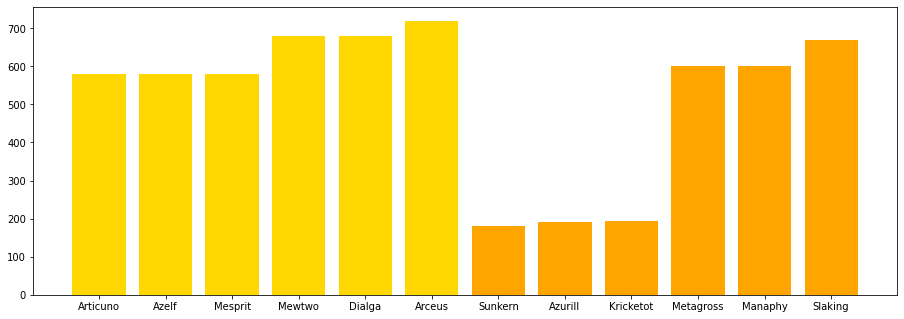

In [ ]:
# Comparativa -> plt.bar

cbar = nrml.sort_values(by='Total').head(3)
cbar = cbar.append(nrml.sort_values(by='Total').tail(3))
cbar = cbar.append(legen.sort_values(by='Total').tail(3))
cbar = cbar.append(legen.sort_values(by='Total').head(3))
cbar = cbar.sort_values(by = 'Total')

fig = plt.figure()
bar = fig.add_axes([0,0,2,1])
names = cbar['Name']
totals = cbar['Total']

mask1 = cbar['Legendary'] == True
mask2 = cbar['Legendary'] == False

bar.bar(names[mask1], totals[mask1], color = 'gold')
bar.bar(names[mask2], totals[mask2], color = 'orange')
plt.show()

In [ ]:
# Definimos total > 500 como competitivamente viable

comp = poke[poke['Total'] > 500]
print('Total:          ',comp.shape[0])
print('')
print('Legendario:     ',comp[comp['Legendary']==True].shape[0])
print('No Legendario:  ',comp[comp['Legendary']==False].shape[0])

Total:           157

Legendario:      46
No Legendario:   111


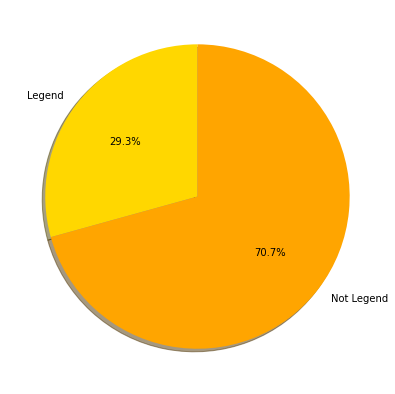

In [ ]:
# Comparativa -> chart

l = comp[comp['Legendary']==True].shape[0]
nl = comp[comp['Legendary']==False].shape[0]

data = [l,nl]
lb = ['Legend', 'Not Legend']

fig = plt.figure(figsize =(10, 7))

plt.pie(data, labels = lb, autopct='%1.1f%%', colors = ['gold', 'orange'] , shadow=True, startangle=90)
 
plt.show()

In [ ]:
# Definimos total >= 600 como competitivamente destacado

comp = poke[poke['Total'] >= 600]
print('Total:           ',comp.shape[0])
print('')
print('Legendario:      ',comp[comp['Legendary']==True].shape[0])
print('No Legendario:   ',comp[comp['Legendary']==False].shape[0])

Total:            43

Legendario:       29
No Legendario:    14


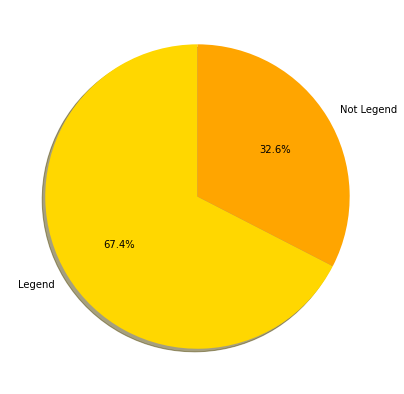

In [ ]:
# Comparativa -> chart

l = comp[comp['Legendary']==True].shape[0]
nl = comp[comp['Legendary']==False].shape[0]

data = [l,nl]
lb = ['Legend', 'Not Legend']

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lb,autopct='%1.1f%%', colors = ['gold', 'orange'], shadow=True, startangle=90)
 
plt.show()

## Modelo

In [ ]:
# Análisis según tipo primario

# sólo tipos planta
grass = poke[poke['Type 1'] == 'Grass']


# sólo tipos fuego
fire = poke[poke['Type 1'] == 'Fire']


In [ ]:
# Estandarización

stand = StandardScaler()

In [ ]:
# Para el pca Planta

grasspca = grass[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']]
grasspca = stand.fit_transform(grasspca)

In [ ]:
# Para el pca Fuego

firepca = fire[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']]
firepca = stand.fit_transform(firepca)

In [ ]:
# PCA - a 3 componentes

pca = PCA(n_components=3)
dfg = pca.fit_transform(grasspca)
dff = pca.fit_transform(firepca)

In [ ]:
# Dataframes a partir de los pca

dfg = pd.DataFrame({'PCA_Stats1':grasspca[:,0],'PCA_Stats2':grasspca[:,1],'PCA_Stats3':grasspca[:,2] ,'Name':grass['Name']})
dff = pd.DataFrame({'PCA_Stats1':firepca[:,0],'PCA_Stats2':firepca[:,1],'PCA_Stats3':firepca[:,2] ,'Name':fire['Name']})

In [ ]:
# Que los nombres sean los index

dfg = dfg.set_index('Name')
dff = dff.set_index('Name')

In [ ]:
# DataFrame Grass

dfg.head()

,PCA_Stats1,PCA_Stats2,PCA_Stats3
Name,,,
Bulbasaur,-1.101337,-0.916898,-0.856575
Ivysaur,-0.321978,-0.372846,-0.267680
Venusaur,0.717168,0.464156,0.573599
Oddish,-1.101337,-0.875048,-0.604191
Gloom,-0.321978,-0.247296,0.026768


In [ ]:
# DataFrame Fire

dff.head()

,PCA_Stats1,PCA_Stats2,PCA_Stats3
Name,,,
Charmander,-1.526918,-1.204155,-0.976860
Charmeleon,-0.546661,-0.725885,-0.307583
Charizard,0.485189,0.071232,0.584787
Vulpix,-1.578511,-1.642570,-1.110716
Ninetales,0.227227,-0.247615,0.450932


In [ ]:
# Representatividad de cada componente

pca.explained_variance_ratio_

array([0.56665469, 0.16829956, 0.12614304])

In [ ]:
# Presición

pca.explained_variance_ratio_.sum()

0.861097294280121

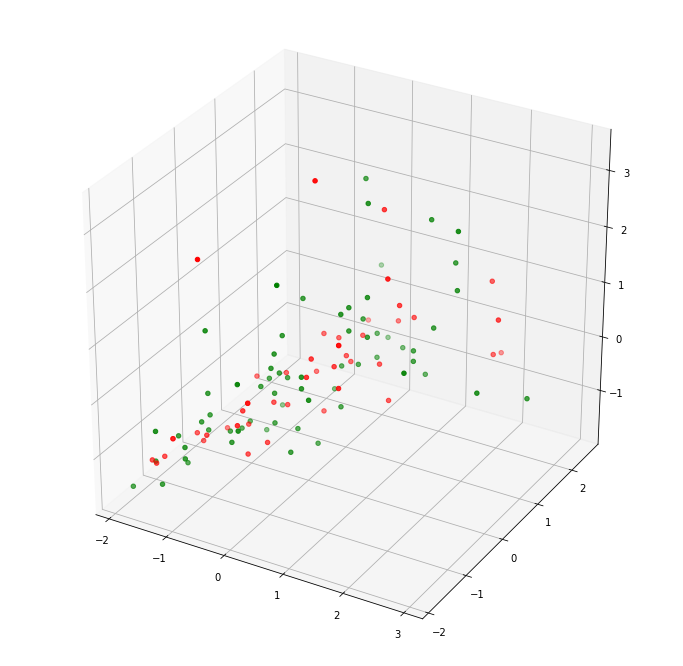

Fire:  47
Grass:  66


In [ ]:
# Graficar el PCA a tres componentes, de ambos DF

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
x = dfg['PCA_Stats1']
y = dfg['PCA_Stats2']
z = dfg['PCA_Stats3']
ax.scatter(x,y,z,marker='o', c='green')

x = dff['PCA_Stats1']
y = dff['PCA_Stats2']
z = dff['PCA_Stats3']
ax.scatter(x,y,z,marker='o', c='red')


# Nombres
'''
for i, name in enumerate(grass['Name']):
  ax.text( dfg['PCA_Stats1'][i], dfg['PCA_Stats2'][i], dfg['PCA_Stats3'][i], name ) 


for i, name in enumerate(fire['Name']):
  ax.text( dff['PCA_Stats1'][i], dff['PCA_Stats2'][i], dff['PCA_Stats3'][i], name )
'''

plt.show()
print('Fire: ',fire.shape[0])
print('Grass: ',grass.shape[0])

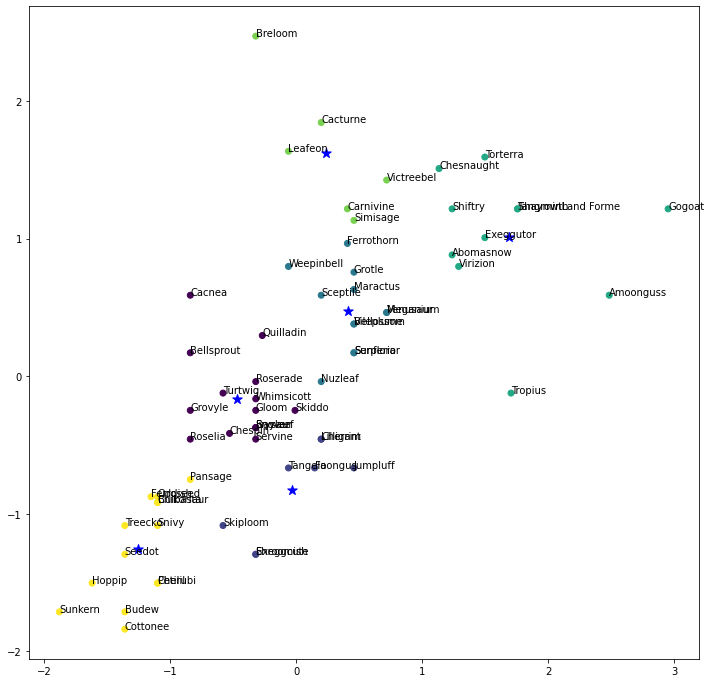

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
286,Breloom,Grass,Fighting,460,60,130,80,60,60,70,3,False
673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False


In [ ]:
# Grass Kmeans

kmeans = KMeans(n_clusters=6, max_iter=len(grasspca[:,1]))
fit = kmeans.fit_predict(dfg[['PCA_Stats1', 'PCA_Stats2']])

centroid = kmeans.cluster_centers_
plt.scatter(dfg['PCA_Stats1'], dfg['PCA_Stats2'], c= kmeans.labels_.astype(float) ,alpha=5) 
plt.scatter(centroid[:,0], centroid[:,1], c='blue', marker='*',s=100 )

for i, txt in enumerate(grass['Name']):
  plt.annotate(txt, (dfg['PCA_Stats1'][i], dfg['PCA_Stats2'][i]))
 
plt.rcParams["figure.figsize"] = (12,12) 
plt.show()
grass[(grass['Name'] == 'Sh' ) | (grass['Name'] == 'Gogoat' )]

In [ ]:
grass.sort_values(by='Total', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
465,Tangrowth,Grass,NaN,535,100,100,125,110,50,50,4,False
673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False
652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...
546,Cottonee,Grass,Fairy,280,40,27,60,37,50,66,5,False
420,Cherubi,Grass,NaN,275,45,35,45,62,53,35,4,False
187,Hoppip,Grass,Flying,250,35,35,40,35,55,50,2,False


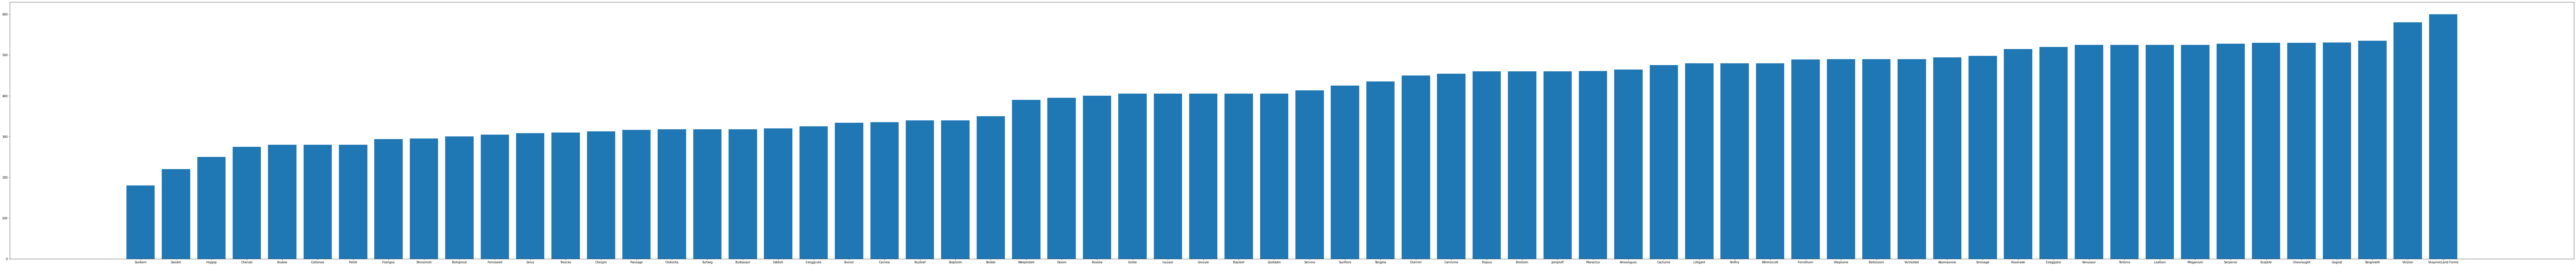

In [ ]:
gsort = grass.sort_values(by='Total', ascending=True)

fig = plt.figure()
bar = fig.add_axes([0,0,10,1])
names = gsort['Name']
totals = gsort['Total']
bar.bar(names,totals)
plt.show()

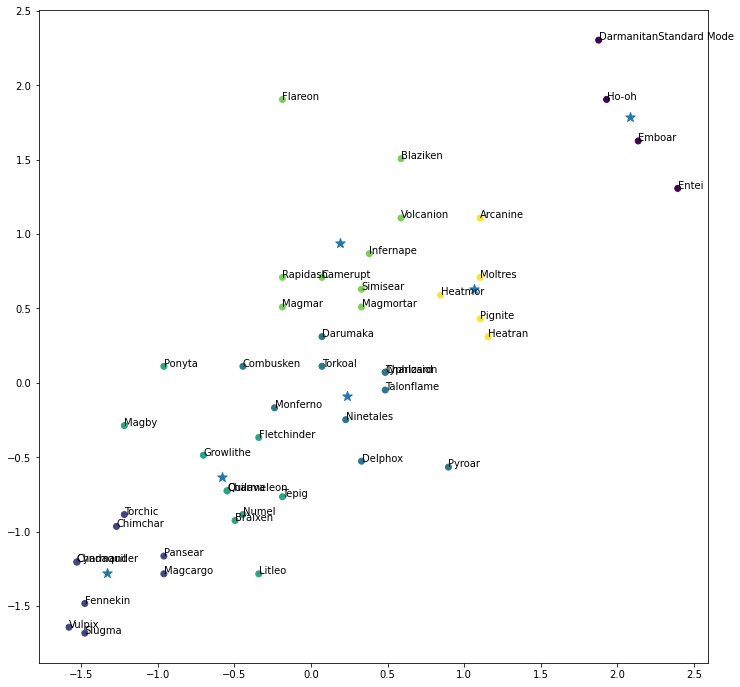

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [ ]:
# Fire Kmeans

kmeans = KMeans(n_clusters=6, max_iter=len(firepca[:,1]))
fit = kmeans.fit_predict(dff[['PCA_Stats1', 'PCA_Stats2']])

centroid = kmeans.cluster_centers_
plt.scatter(dff['PCA_Stats1'], dff['PCA_Stats2'],
c= kmeans.labels_.astype(float) ,alpha=5) 
plt.scatter(centroid[:,0], centroid[:,1], marker='*',s=100)

for i, txt in enumerate(fire['Name']):
  plt.annotate(txt, (dff['PCA_Stats1'][i], dff['PCA_Stats2'][i]))
 
plt.rcParams["figure.figsize"] = (10,10) 
plt.show()

fire[(fire['Name'] == 'Ho-oh' ) | (fire['Name'] == 'Vulpix' )]

In [ ]:
fire.sort_values(by='Total', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
467,Magmortar,Fire,NaN,540,75,95,67,125,95,83,4,False
655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False
392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


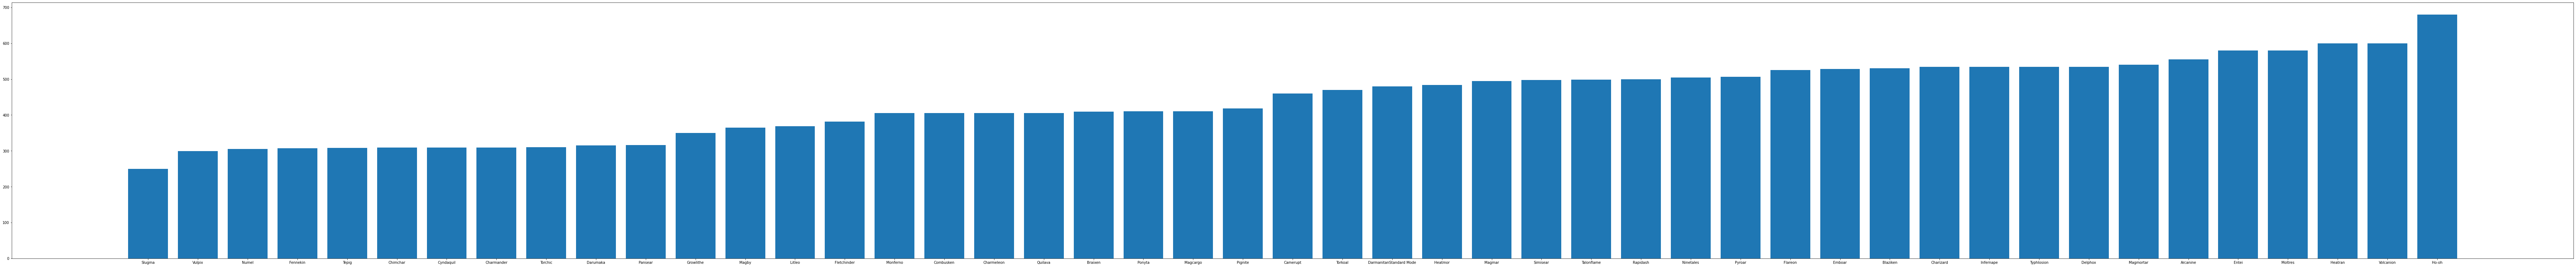

In [ ]:
fsort = fire.sort_values(by='Total', ascending=True)

fig = plt.figure()
bar = fig.add_axes([0,0,10,1])
names = fsort['Name']
totals = fsort['Total']
bar.bar(names,totals)

plt.show()

In [ ]:
# Comparativa Final

print(Back.BLACK+'General: \n')
print(Fore.RED+'Fire: ',fsort['Total'].mean())
print(Fore.GREEN+'Grass: ',gsort['Total'].mean())
print('')
print(Fore.WHITE+'Bottom 3:   \n')
print(Fore.RED+'Fire: ',fsort['Total'].head(3).mean())
print(Fore.GREEN+'Grass: ',gsort['Total'].head(3).mean())
print('')
print(Fore.WHITE+'Top 3:   \n')
print(Fore.RED+'Fire: ',fsort['Total'].tail(3).mean())
print(Fore.GREEN+'Grass: ',gsort['Total'].tail(3).mean())

General: 

Fire:  443.02127659574467
Grass:  409.56060606060606

Bottom 3:   

Fire:  284.6666666666667
Grass:  216.66666666666666

Top 3:   

Fire:  626.6666666666666
Grass:  571.6666666666666
